## Natural Language Processing Project

In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_df = pd.read_csv('yelp.csv')

In [4]:
#checking basic info of data
data_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
data_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [29]:
import re
#Creating new column called "text length" where it holds number of words in every comment
#data_df['text length'] = data_df['text'].apply(lambda x: len(re.findall(r"\w+",x)))
data_df['text length'] = data_df['text'].apply(len)

### Exploratory data analysis

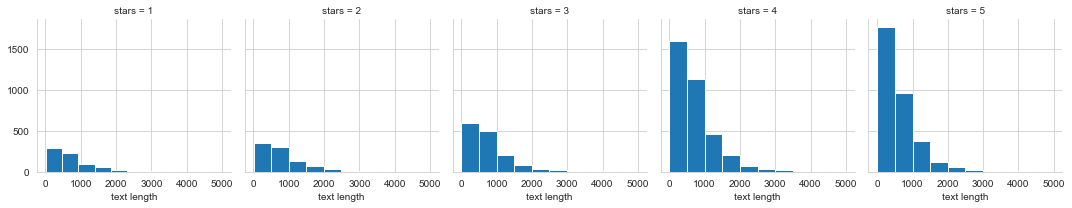

In [30]:
#Plotting length of text histograms against number of stars. Helps to see if number of words has some relation to number of stars.
g = sns.FacetGrid(data_df, col="stars")
g = g.map(plt.hist, "text length")

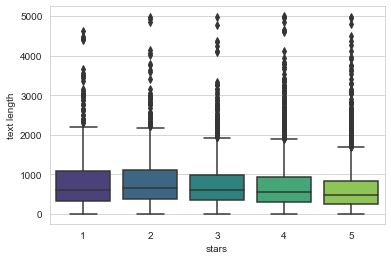

In [31]:
#Creating boxplot for same columns
sns.boxplot(x='stars', y='text length', data=data_df, palette='viridis')

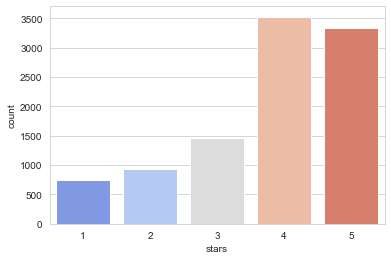

In [32]:
#Countplot for number of occurences of every number of stars
sns.set_style('whitegrid')
sns.countplot(x='stars', data=data_df, palette='coolwarm')

In [33]:
#Creating mean of every numerical column (number of funny,useful,funny review based on number of stars)
mean_values_df = data_df.groupby('stars')['cool', 'useful', 'funny', 'text length'].mean()

In [37]:
#checking correlation of those columns
mean_corr = mean_values_df.corr()
mean_corr

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


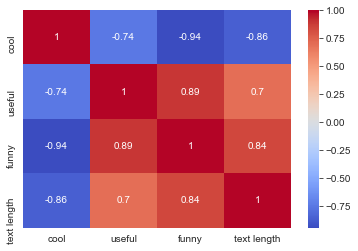

In [41]:
sns.heatmap(mean_corr, cmap='coolwarm', annot=True)

## NLP Task

In [47]:
#Creating df which includes entries with only 1 or 5 stars review
yelp_class = data_df.loc[(data_df['stars'] == 5) | (data_df['stars'] == 1)]

In [50]:
#Creating feature and target values X, y. X == 'text' column, y == 'stars' column

X = yelp_class['text']
y = yelp_class['stars']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
#I will use CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.
CV = CountVectorizer()

In [54]:
X = CV.fit_transform(X)

In [55]:
#splitting into train and test parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
#Training model. Using MultinomialNB (Naive Bayes)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [57]:
#Fitting training data
nb.fit(X_train, y_train)

MultinomialNB()

In [58]:
#Prediction
pred = nb.predict(X_test)

In [60]:
#Checking confusion matrix and classification report to see power of this model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))

[[159  69]
 [ 22 976]]


In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



### Text processing

Now I will use Tf-Idf (Term frequency - inverse document frequency) to see if I can imporve what I've got previously.

In [64]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [65]:
#Creating pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [66]:
#Firstly, need to do splitting of data once more because right now X is already vectorized
X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
#fitting to pipeline

pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [68]:
pred_pipeline = pipeline.predict(X_test)

In [69]:
print(confusion_matrix(y_test, pred_pipeline))

[[  0 228]
 [  0 998]]


In [70]:
print(classification_report(y_test, pred_pipeline))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



c:\users\grina\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pipeline actually made things worse
TODO:
    Check other models in classifier to see if things could be improved.